In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [2]:
df = pd.read_excel('bnc_loan_data.xlsx')
display(df.head(),df.tail())

,Month,Loan Type,Loan Status,Total Loan Applicants,Total Loan Amount
0,2016-01-01,Loan A,Rejected,183.6,77597520.0
1,2016-01-01,Loan B,Rejected,10.2,1999342.8
2,2016-01-01,Loan C,Rejected,28947.6,499696470.0
3,2016-01-01,Loan E,Rejected,10.2,139230.0
4,2016-01-01,Loan F,Rejected,1744.2,24411660.0


,Month,Loan Type,Loan Status,Total Loan Applicants,Total Loan Amount
150,2016-06-01,Loan F,Pending,10.2,129948.0
151,2016-06-01,Loan G,Pending,20.4,3833466.0
152,2016-06-01,Loan H,Pending,1683.0,38752350.0
153,2016-06-01,Loan I,Pending,91.8,3406494.0
154,2016-06-01,Loan J,Pending,71.4,1923230.4


In [3]:
pd.set_option('display.max_colwidth', None)
display(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'Column Name': df.columns.values,
    'Data Type': df.dtypes.values,
    'Number of Unique': df.nunique().values,
    'Unique Sample': [df[col].unique() for col in df.columns]
    }
)

'Total rows 155, Total Colum 5'

,Column Name,Data Type,Number of Unique,Unique Sample
0,Month,datetime64[ns],6,"[2016-01-01 00:00:00, 2016-02-01 00:00:00, 2016-03-01 00:00:00, 2016-04-01 00:00:00, 2016-05-01 00:00:00, 2016-06-01 00:00:00]"
1,Loan Type,object,10,"[Loan A, Loan B, Loan C, Loan E, Loan F, Loan G, Loan H, Loan I, Loan J, Loan D]"
2,Loan Status,object,3,"[Rejected, Approved, Pending]"
3,Total Loan Applicants,float64,101,"[183.6, 10.2, 28947.600000000002, 1744.2, 81.6, 33894.6, 1795.2, 9465.6, 479.40000000000003, 112.2, 67717.8, 61.2, 2978.4, 510.0, 146992.2, 8894.4, 12688.800000000001, 1723.8, 20.4, 71.4, 3029.4, 102.0, 122.4, 214.20000000000002, 34108.8, 2111.4, 32252.4, 2723.4, 10832.4, 622.2, 173.4, 77418.0, 2988.6, 530.4, 159966.6, 13841.4, 15198.0, 30.6, 1397.4, 40.8, 1071.0, 234.6, 34986.0, 2509.2, 32119.8, 2550.0, 10577.4, 632.4, 82201.8, 3274.2000000000003, 171196.80000000002, 14524.800000000001, 14677.800000000001, 51.0, 1366.8, 826.2, 255.0, 32619.600000000002, 2274.6, 52713.6, 5293.8, 12321.6, 540.6, 163.2, 67666.8, 2672.4, 459.0, 342220.2, 30120.600000000002, 16054.800000000001, 836.4, 652.8, 37566.6, 1825.8, 57936.0, 5814.0, 13045.800000000001, 469.2, 153.0, 72807.6, 2478.6, 367.2, 333142.2, 30691.8, 17411.4, 4284.0, 132.6, 193.8, 37209.6, 1887.0, 57334.200000000004, 6099.6, 13015.2, 71165.4, 2621.4, 358846.2, 32650.2, 17554.2, 1499.4, 1683.0, ...]"
4,Total Loan Amount,float64,154,"[77597520.0, 1999342.8, 499696470.0, 139230.0, 24411660.0, 15008994.0, 872882992.8000001, 67563678.0, 241612316.4, 197327430.3, 17860424.4, 1137128538.0, 8752926.0, 41657616.0, 96409349.4, 3327318540.0, 323873113.2, 295325394.0, 29516904.84, 36144108.0, 4009824.0, 12202117.200000001, 82260796.8, 3736933.2, 2669503.2, 94272168.9, 1522248.0, 593769540.0, 29591016.0, 10095103.2, 811471424.4, 105105655.2, 282618336.0, 246740157.3, 30682579.2, 1307174778.0, 10033842.0, 41880384.0, 98107027.2, 3537362774.4, 509347893.6, 362688580.8, 18486959.4, 29349684.0, 1995630.0, 7546266.0, 29774799.6, 3309961.2, 1926943.2, 106109967.60000001, 4882332.0, 607729668.0, 1021020.0, 35178780.0, 13319670.0, 818581436.4, 99625562.4, 267715156.8, 234379317.9, 33736357.2, 1386935004.0, 10971324.0, 45834516.0, 122270857.8, 3795938874.0, 537281144.4, 348284773.2, 38383854.6, 677586.0, 28690662.0, 5170074.0, 9653280.0, 25894923.6, 1000599.6, 1496258.4000000001, 109256565.60000001, 1791426.0, 562034382.0, 1475838.0, 31837260.0, 10852514.4, 1279583104.8, 209097470.4, 327732568.8, 208393894.8, 26047148.400000002, 1142502816.0, 8687952.0, 723996.0, 37387896.0, 88532644.2, 7362430420.8, 1114155588.0, 394919397.6, 28207533.900000002, 17580108.0, 1884246.0, 5346432.0, 18742214.4, 1145398.8, ...]"


<Axes: >

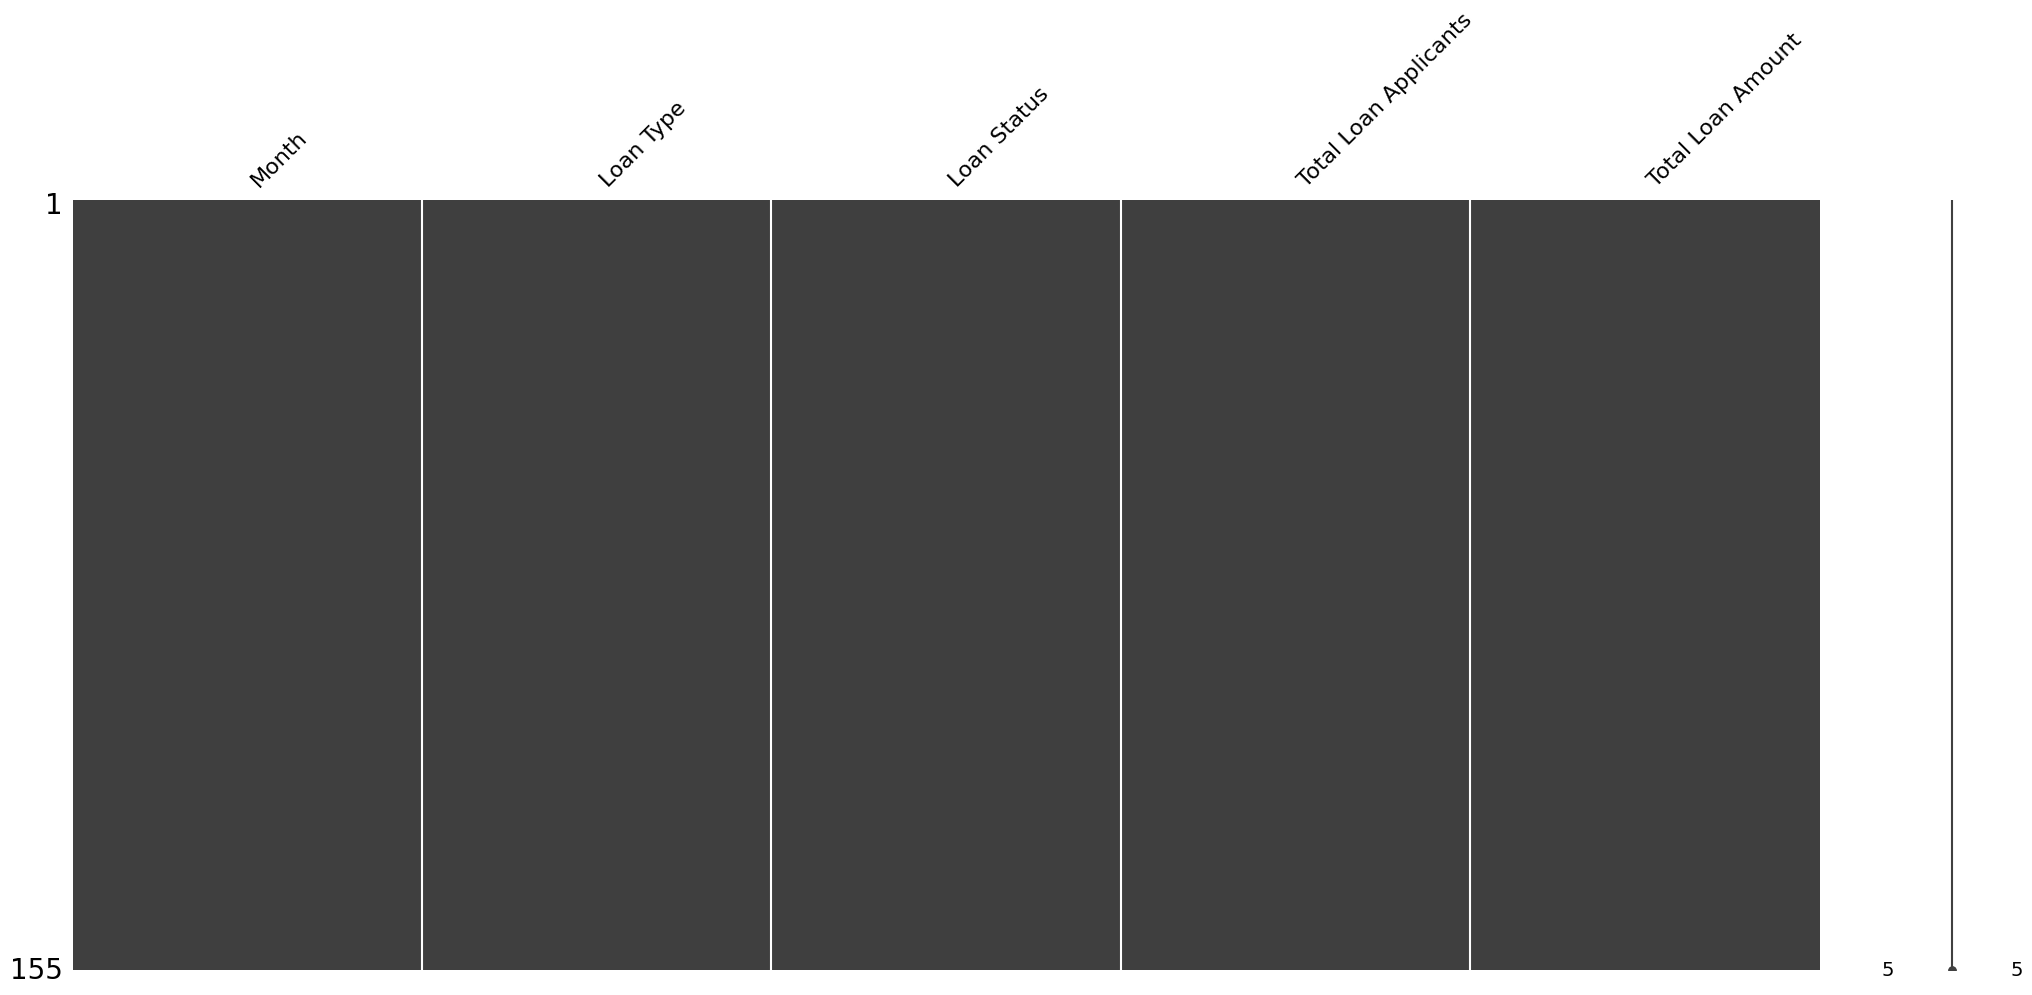

In [4]:
missingno.matrix(df)

In [5]:
df.isna().sum()

Month                    0
Loan Type                0
Loan Status              0
Total Loan Applicants    0
Total Loan Amount        0
dtype: int64

In [6]:
df[df.duplicated()]

,Month,Loan Type,Loan Status,Total Loan Applicants,Total Loan Amount


In [7]:
numeric_column = ['Total Loan Applicants','Total Loan Amount']

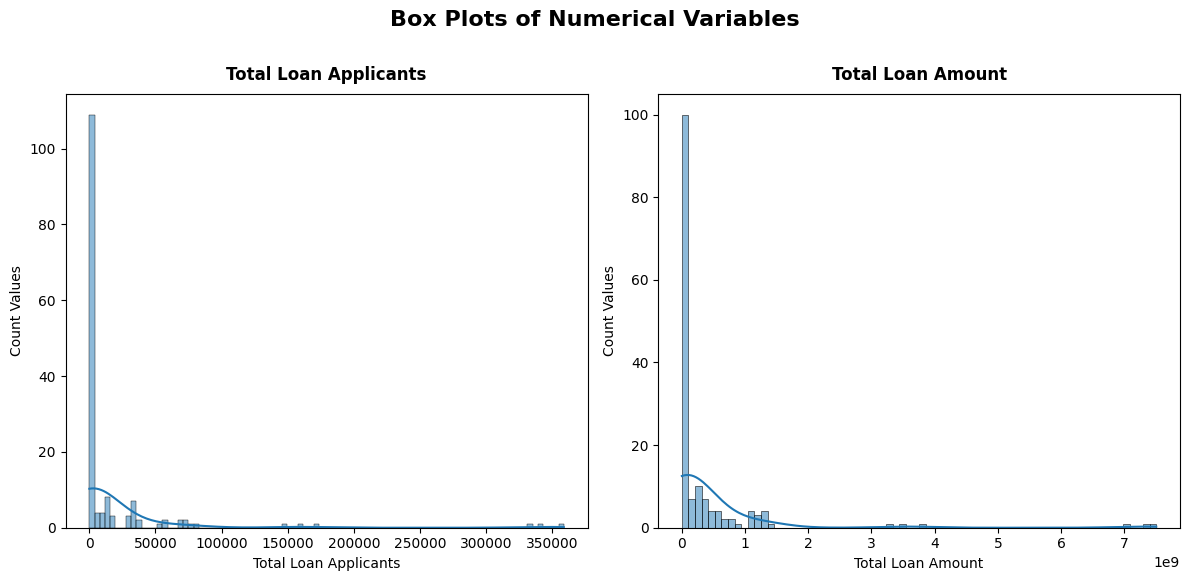

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes = axes.flatten()

for i, col in enumerate(numeric_column):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count Values')

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [9]:
from scipy.stats import shapiro

for column in  numeric_column:
    stat,p = shapiro(df[column].dropna())
    alpha = 0.05
    if p > alpha:
        display(f"Kolom '{column}' terdistribusi normal (p-value: {p:.4f})")
    else:
        display(f"Kolom '{column}' tidak terdistribusi normal (p-value: {p:.4f})")

"Kolom 'Total Loan Applicants' tidak terdistribusi normal (p-value: 0.0000)"

"Kolom 'Total Loan Amount' tidak terdistribusi normal (p-value: 0.0000)"

# Exploratory Data Analysis

In [10]:
pd.set_option('display.max_columns', None)
display(df.describe(),df.describe(include='object'))

,Month,Total Loan Applicants,Total Loan Amount
count,155,155.000000,1.550000e+02
mean,2016-03-18 21:12:46.451612928,18061.370323,4.107780e+08
min,2016-01-01 00:00:00,10.200000,1.299480e+05
25%,2016-02-01 00:00:00,51.000000,6.933654e+06
50%,2016-04-01 00:00:00,510.000000,3.614411e+07
75%,2016-05-01 00:00:00,10704.900000,2.889719e+08
max,2016-06-01 00:00:00,358846.200000,7.507302e+09
std,NaN,53497.178680,1.131943e+09


,Loan Type,Loan Status
count,155,155
unique,10,3
top,Loan A,Approved
freq,18,57


## Numerik

In [11]:
df.describe()

,Month,Total Loan Applicants,Total Loan Amount
count,155,155.000000,1.550000e+02
mean,2016-03-18 21:12:46.451612928,18061.370323,4.107780e+08
min,2016-01-01 00:00:00,10.200000,1.299480e+05
25%,2016-02-01 00:00:00,51.000000,6.933654e+06
50%,2016-04-01 00:00:00,510.000000,3.614411e+07
75%,2016-05-01 00:00:00,10704.900000,2.889719e+08
max,2016-06-01 00:00:00,358846.200000,7.507302e+09
std,NaN,53497.178680,1.131943e+09


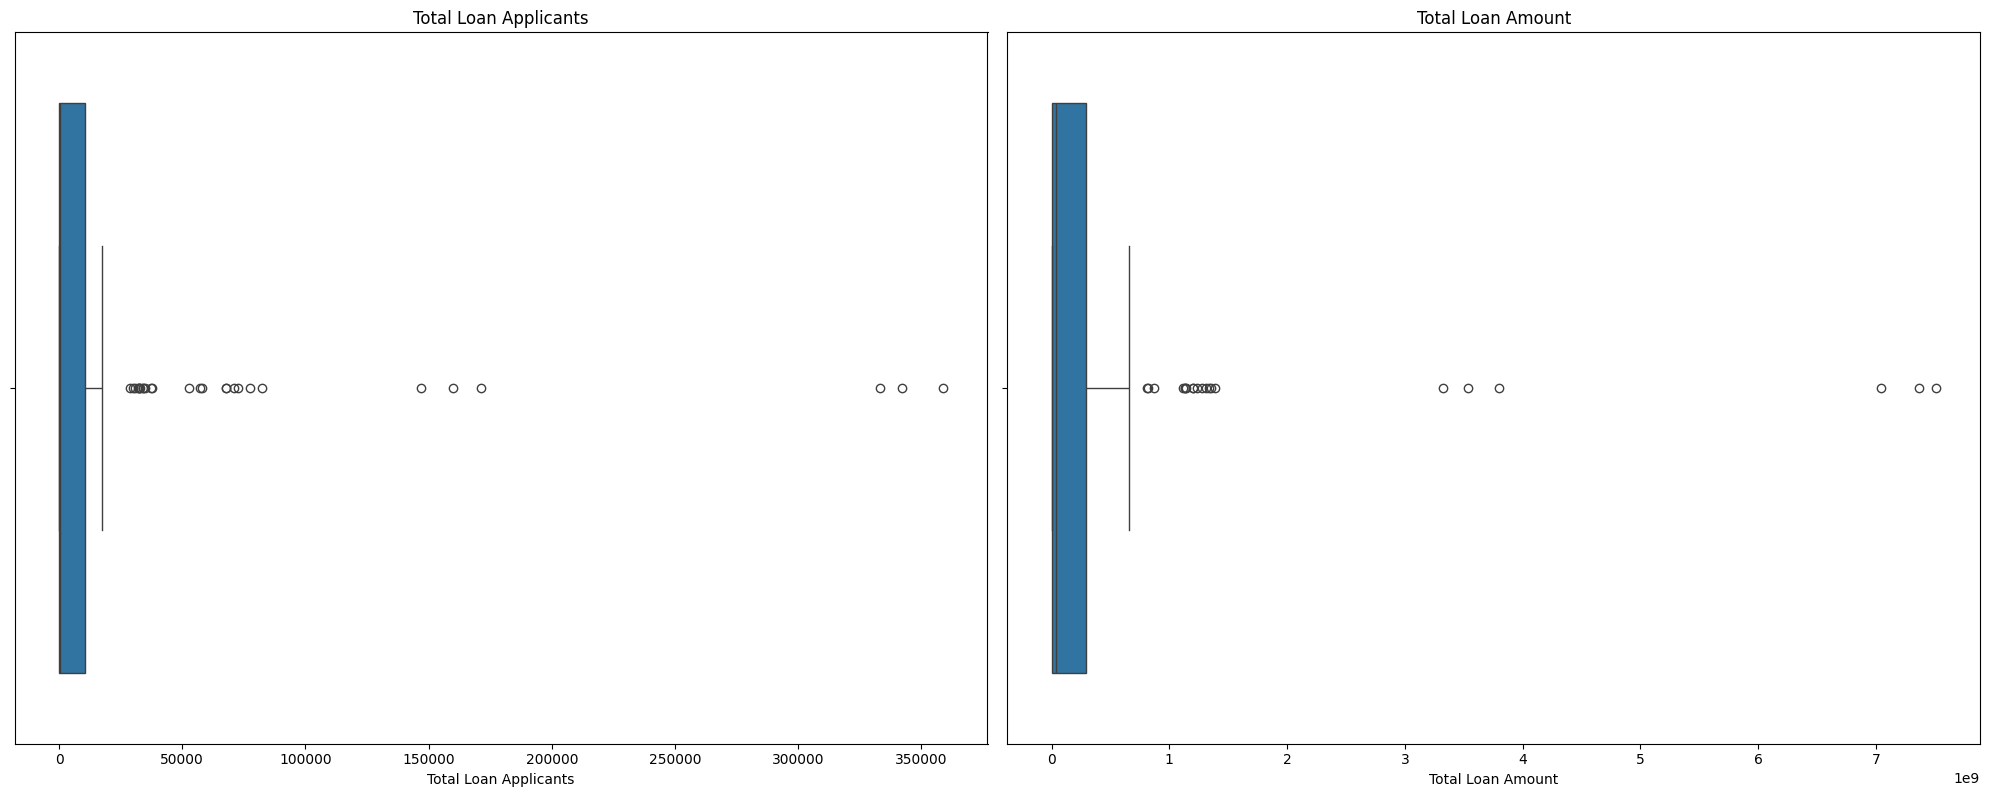

In [12]:
# Cek menggunakan boxplot untuk melihat outliers pada seluruh kolom numerik
numerik = df.select_dtypes(include='number')
fig = plt.figure(figsize=(20,100))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout()
    plt.title(f'{kolom}')
plt.show()

In [13]:
# Menggunakan IQR untuk mendapatkan jumlah outliers

for kolom in numerik.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  display(f'{kolom} memiliki outliers {jumlah_outliers}')

'Total Loan Applicants memiliki outliers 27'

'Total Loan Amount memiliki outliers 21'

In [14]:
numerik.corr(method = 'spearman')

,Total Loan Applicants,Total Loan Amount
Total Loan Applicants,1.000000,0.926055
Total Loan Amount,0.926055,1.000000


<Axes: >

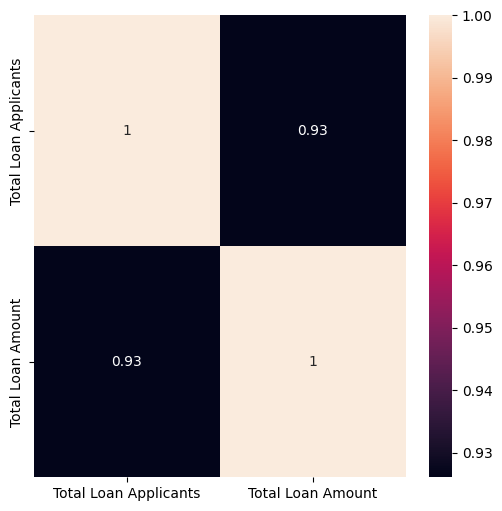

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

## Kategorik

In [16]:
kategorik = df.select_dtypes(include = 'object')
kategorik

,Loan Type,Loan Status
0,Loan A,Rejected
1,Loan B,Rejected
2,Loan C,Rejected
3,Loan E,Rejected
4,Loan F,Rejected
...,...,...
150,Loan F,Pending
151,Loan G,Pending
152,Loan H,Pending
153,Loan I,Pending


In [17]:
kategorik.nunique()

Loan Type      10
Loan Status     3
dtype: int64

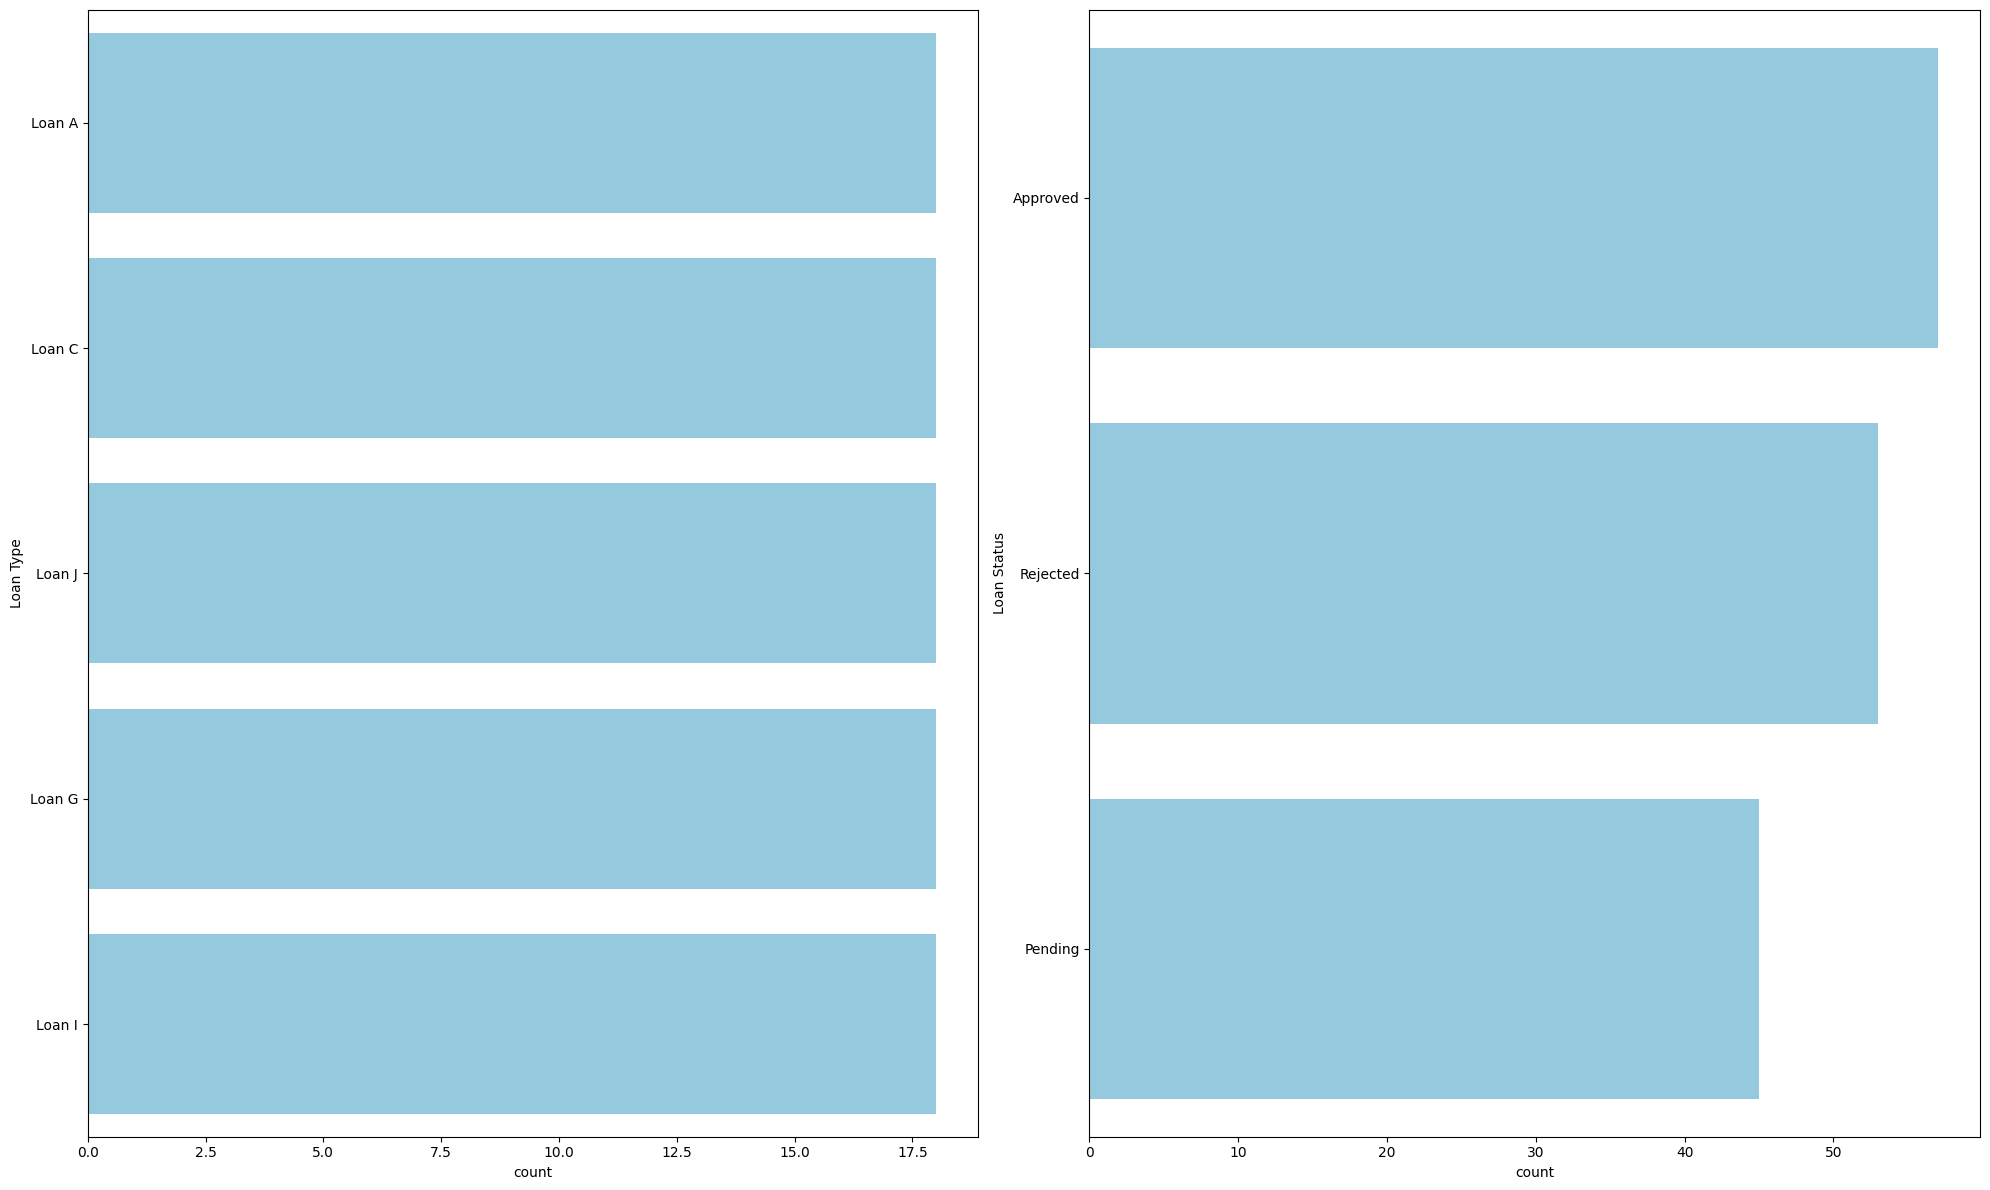

In [18]:
count = 0
fig = plt.figure(figsize=(20,12))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(1,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

In [21]:
# Calculate Loan Performance Metrics
metrics = {}

# 1. Approval Rate
total_loans = len(df)
approved_loans = len(df[df["Loan Status"] == "Approved"])
approval_rate = (approved_loans / total_loans) * 100
metrics['Approval Rate (%)'] = approval_rate

# 2. Rejection Rate
rejected_loans = len(df[df["Loan Status"] == "Rejected"])
rejection_rate = (rejected_loans / total_loans) * 100
metrics['Rejection Rate (%)'] = rejection_rate

# 3. Average Loan Amount
average_loan_amount = df["Total Loan Amount"].mean()
metrics['Average Loan Amount'] = average_loan_amount

# 4. Average Number of Loan Applicants
average_loan_applicants = df["Total Loan Applicants"].mean()
metrics['Average Loan Applicants'] = average_loan_applicants

# 5. Loan Volume per Loan Type
loan_volume_per_type = df.groupby("Loan Type")["Total Loan Amount"].sum().reset_index()
metrics['Loan Volume per Loan Type'] = loan_volume_per_type

# 6. Approval Rate by Loan Type
approval_rate_by_type = df[df["Loan Status"] == "Approved"].groupby("Loan Type").size() / df.groupby("Loan Type").size() * 100
approval_rate_by_type = approval_rate_by_type.reset_index(name='Approval Rate (%)')
metrics['Approval Rate by Loan Type (%)'] = approval_rate_by_type

# 7. Loan Growth Over Time
# Convert Month to datetime for time analysis
df['Month'] = pd.to_datetime(df['Month'], format='%d/%m/%Y')

# Grouping by year and month to calculate the growth
loan_data_by_month = df.groupby(df['Month'].dt.to_period("M"))['Total Loan Amount'].sum()
loan_growth = loan_data_by_month.pct_change().fillna(0) * 100  # Percent change from one month to the next
metrics['Loan Growth Over Time (%)'] = loan_growth.reset_index(name='Loan Growth (%)')

# 8. Concentration of Loan Applicants by Loan Type
concentration_of_loan_applicants = df.groupby("Loan Type")["Total Loan Applicants"].sum().reset_index()
metrics['Concentration of Loan Applicants by Loan Type'] = concentration_of_loan_applicants

# Output all calculated metrics
for key, value in metrics.items():
    print(f"{key}:\n{value}\n")


Approval Rate (%):
36.774193548387096

Rejection Rate (%):
34.193548387096776

Average Loan Amount:
410778015.9131612

Average Loan Applicants:
18061.37032258065

Loan Volume per Loan Type:
  Loan Type  Total Loan Amount
0    Loan A       2.034185e+09
1    Loan B       1.728160e+08
2    Loan C       1.112317e+10
3    Loan D       7.724480e+07
4    Loan E       2.116296e+06
5    Loan F       4.112112e+08
6    Loan G       6.662462e+08
7    Loan H       3.932588e+10
8    Loan I       5.784505e+09
9    Loan J       4.073214e+09

Approval Rate by Loan Type (%):
  Loan Type  Approval Rate (%)
0    Loan A          33.333333
1    Loan B          42.857143
2    Loan C          33.333333
3    Loan D          37.500000
4    Loan E          75.000000
5    Loan F          46.153846
6    Loan G          33.333333
7    Loan H          33.333333
8    Loan I          33.333333
9    Loan J          33.333333

Loan Growth Over Time (%):
     Month  Loan Growth (%)
0  2016-01         0.000000
1  2016-02 

In [20]:
# Assuming the metrics dictionary has been calculated as described in your example

# 1. Create a DataFrame for single-value metrics
single_value_metrics = {
    'Approval Rate (%)': [metrics['Approval Rate (%)']],
    'Rejection Rate (%)': [metrics['Rejection Rate (%)']],
    'Average Loan Amount': [metrics['Average Loan Amount']],
    'Average Loan Applicants': [metrics['Average Loan Applicants']]
}

df_single_metrics = pd.DataFrame(single_value_metrics)

# 2. Extract the multi-row metrics
# Loan Volume per Loan Type
df_loan_volume_per_type = metrics['Loan Volume per Loan Type']

# Approval Rate by Loan Type
df_approval_rate_by_type = metrics['Approval Rate by Loan Type (%)']

# Loan Growth Over Time
df_loan_growth = metrics['Loan Growth Over Time (%)']

# Concentration of Loan Applicants by Loan Type
df_concentration_of_loan_applicants = metrics['Concentration of Loan Applicants by Loan Type']

# Output the dataframes
display("Single Value Metrics:")
display(df_single_metrics)

display("Loan Volume per Loan Type:")
display(df_loan_volume_per_type)

display("Approval Rate by Loan Type:")
display(df_approval_rate_by_type)

display("Loan Growth Over Time:")
display(df_loan_growth)

display("Concentration of Loan Applicants by Loan Type:")
display(df_concentration_of_loan_applicants)


'Single Value Metrics:'

,Approval Rate (%),Rejection Rate (%),Average Loan Amount,Average Loan Applicants
0,36.774194,34.193548,4.107780e+08,18061.370323


'Loan Volume per Loan Type:'

,Loan Type,Total Loan Amount
0,Loan A,2.034185e+09
1,Loan B,1.728160e+08
2,Loan C,1.112317e+10
3,Loan D,7.724480e+07
4,Loan E,2.116296e+06
5,Loan F,4.112112e+08
6,Loan G,6.662462e+08
7,Loan H,3.932588e+10
8,Loan I,5.784505e+09
9,Loan J,4.073214e+09


'Approval Rate by Loan Type:'

,Loan Type,Approval Rate (%)
0,Loan A,33.333333
1,Loan B,42.857143
2,Loan C,33.333333
3,Loan D,37.500000
4,Loan E,75.000000
5,Loan F,46.153846
6,Loan G,33.333333
7,Loan H,33.333333
8,Loan I,33.333333
9,Loan J,33.333333


'Loan Growth Over Time:'

,Month,Loan Growth (%)
0,2016-01,0.000000
1,2016-02,10.081399
2,2016-03,5.093897
3,2016-04,51.405646
4,2016-05,0.094494
5,2016-06,3.906773


'Concentration of Loan Applicants by Loan Type:'

,Loan Type,Total Loan Applicants
0,Loan A,4885.8
1,Loan B,1060.8
2,Loan C,651259.8
3,Loan D,479.4
4,Loan E,91.8
5,Loan F,29376.0
6,Loan G,3488.4
7,Loan H,1790161.2
8,Loan I,155448.0
9,Loan J,163261.2


In [27]:
df_loan_growth.dtypes

Month              period[M]
Loan Growth (%)      float64
dtype: object

In [22]:
df

,Month,Loan Type,Loan Status,Total Loan Applicants,Total Loan Amount
0,2016-01-01,Loan A,Rejected,183.6,77597520.0
1,2016-01-01,Loan B,Rejected,10.2,1999342.8
2,2016-01-01,Loan C,Rejected,28947.6,499696470.0
3,2016-01-01,Loan E,Rejected,10.2,139230.0
4,2016-01-01,Loan F,Rejected,1744.2,24411660.0
...,...,...,...,...,...
150,2016-06-01,Loan F,Pending,10.2,129948.0
151,2016-06-01,Loan G,Pending,20.4,3833466.0
152,2016-06-01,Loan H,Pending,1683.0,38752350.0
153,2016-06-01,Loan I,Pending,91.8,3406494.0


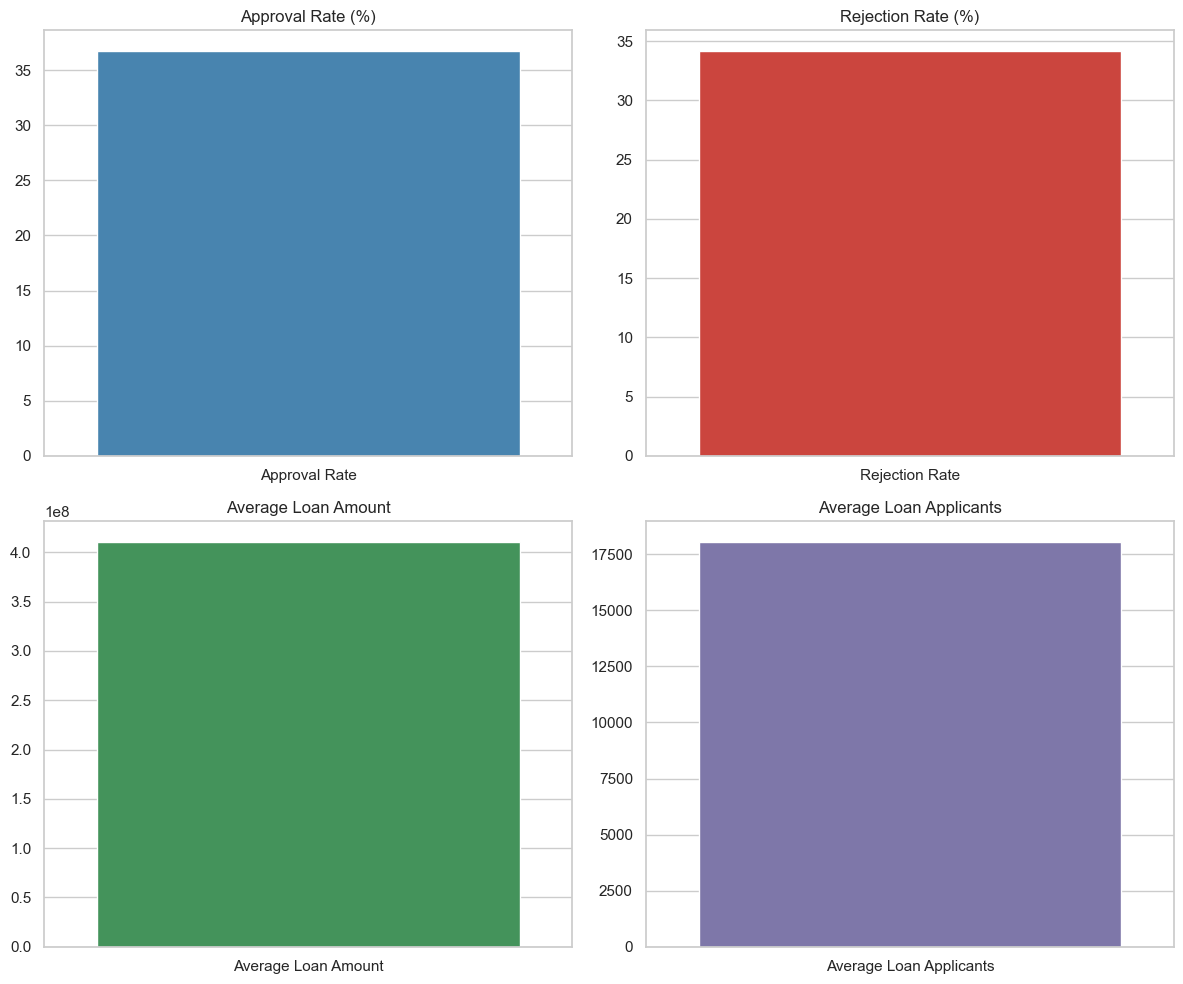

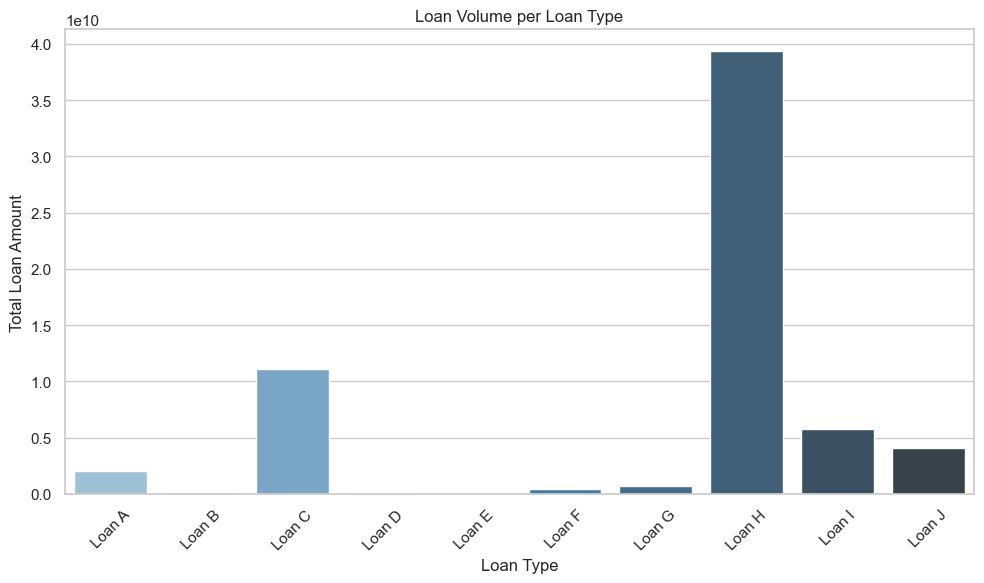

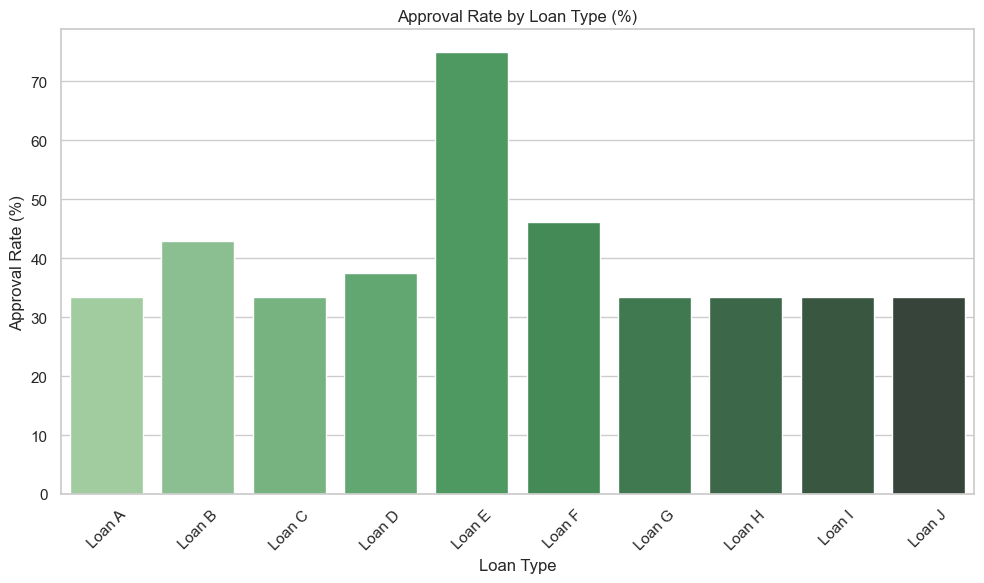

TypeError: Invalid object type at position 0

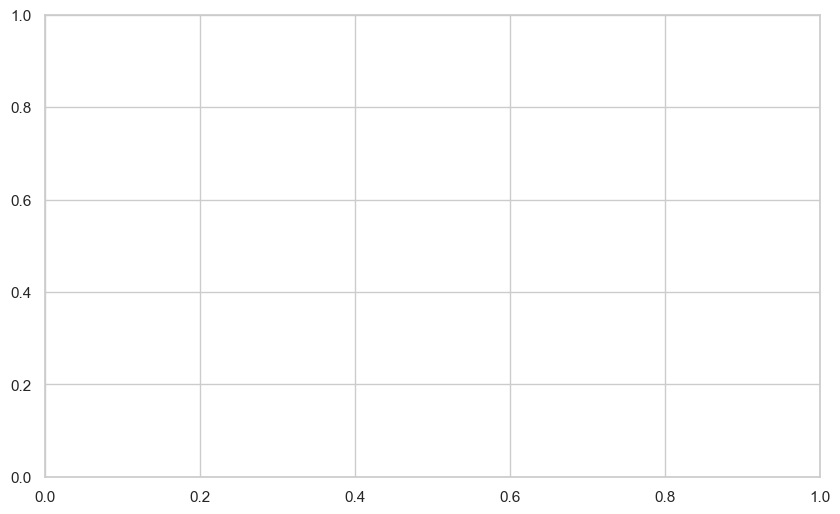

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# 1. Visualization for Single Value Metrics (Approval Rate, Rejection Rate, Average Loan Amount, Average Loan Applicants)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Approval Rate
sns.barplot(x=['Approval Rate'], y=[metrics['Approval Rate (%)']], ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title('Approval Rate (%)')

# Rejection Rate
sns.barplot(x=['Rejection Rate'], y=[metrics['Rejection Rate (%)']], ax=axes[0, 1], palette="Reds_d")
axes[0, 1].set_title('Rejection Rate (%)')

# Average Loan Amount
sns.barplot(x=['Average Loan Amount'], y=[metrics['Average Loan Amount']], ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title('Average Loan Amount')

# Average Loan Applicants
sns.barplot(x=['Average Loan Applicants'], y=[metrics['Average Loan Applicants']], ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title('Average Loan Applicants')

plt.tight_layout()
plt.show()

# 2. Loan Volume per Loan Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan Type', y='Total Loan Amount', data=metrics['Loan Volume per Loan Type'], palette="Blues_d")
plt.title('Loan Volume per Loan Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Approval Rate by Loan Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan Type', y='Approval Rate (%)', data=metrics['Approval Rate by Loan Type (%)'], palette="Greens_d")
plt.title('Approval Rate by Loan Type (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Loan Growth Over Time
#

# 5. Concentration of Loan Applicants by Loan Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan Type', y='Total Loan Applicants', data=metrics['Concentration of Loan Applicants by Loan Type'], palette="Purples_d")
plt.title('Concentration of Loan Applicants by Loan Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
